In [0]:
import numpy as np
import matplotlib.pyplot as plt

from utils.data_process import get_CIFAR10_data
from models.neural_net import NeuralNetwork
from kaggle_submission import output_submission_csv

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir("gdrive/My Drive/MP-1/MP2/assignment_2")

# Loading CIFAR-10
Now that you have implemented a neural network that passes gradient checks and works on toy data, you will test your network on the CIFAR-10 dataset.

In [0]:
# You can change these numbers for experimentation
# For submission be sure they are set to the default values 
TRAIN_IMAGES = 49000
VAL_IMAGES = 1000
TEST_IMAGES = 5000

data = get_CIFAR10_data(TRAIN_IMAGES, VAL_IMAGES, TEST_IMAGES)
X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data['X_val'], data['y_val']
X_test, y_test = data['X_test'], data['y_test']

# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

You can try different numbers of layers and also the different activation functions that you implemented on the CIFAR-10 dataset below.

In [10]:

input_size = 32 * 32 * 3
num_layers = 3
hidden_size = 160
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='sigmoid')
#print(net.params["W1"].shape)
#print(net.params["b1"].shape)


# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=5000, batch_size=200,
            learning_rate=1e-1, learning_rate_decay=0.95,
            reg=0.0001, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 5000: loss 2.363944
iteration 100 / 5000: loss 2.111438
iteration 200 / 5000: loss 1.935238
iteration 300 / 5000: loss 1.930012
iteration 400 / 5000: loss 1.878691
iteration 500 / 5000: loss 1.753848
iteration 600 / 5000: loss 1.775402
iteration 700 / 5000: loss 1.773922
iteration 800 / 5000: loss 1.743560
iteration 900 / 5000: loss 1.770804
iteration 1000 / 5000: loss 1.699309
iteration 1100 / 5000: loss 1.580017
iteration 1200 / 5000: loss 1.625743
iteration 1300 / 5000: loss 1.643125
iteration 1400 / 5000: loss 1.736997
iteration 1500 / 5000: loss 1.809356
iteration 1600 / 5000: loss 1.644513
iteration 1700 / 5000: loss 1.629297
iteration 1800 / 5000: loss 1.699605
iteration 1900 / 5000: loss 1.671339
iteration 2000 / 5000: loss 1.501277
iteration 2100 / 5000: loss 1.576229
iteration 2200 / 5000: loss 1.617711
iteration 2300 / 5000: loss 1.606859
iteration 2400 / 5000: loss 1.596384
iteration 2500 / 5000: loss 1.572629
iteration 2600 / 5000: loss 1.683508
iteration 270

# Graph loss and train/val accuracies

Examining the loss graph along with the train and val accuracy graphs should help you gain some intuition for the hyperparameters you should try in the hyperparameter tuning below. It should also help with debugging any issues you might have with your network.

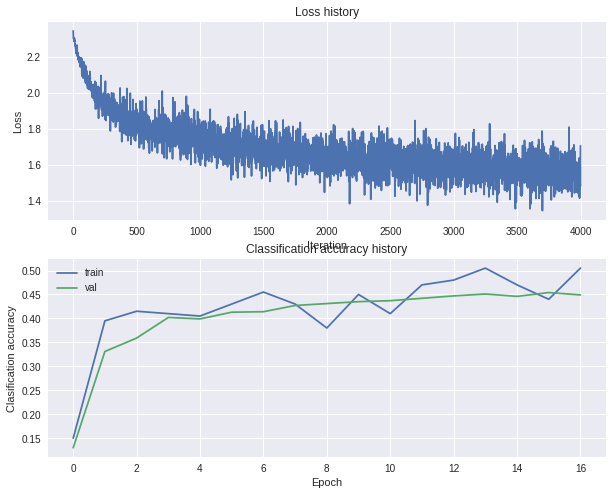

In [43]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

# Hyperparameter tuning

Once you have successfully trained a network you can tune your hyparameters to increase your accuracy.

Based on the graphs of the loss function above you should be able to develop some intuition about what hyperparameter adjustments may be necessary. A very noisy loss implies that the learning rate might be too high, while a linearly decreasing loss would suggest that the learning rate may be too low. A large gap between training and validation accuracy would suggest overfitting due to large model without much regularization. No gap between training and validation accuracy would indicate low model capacity. 


You will compare networks of two and three layers using the different activation functions you implemented. 

The different hyperparameters you can experiment with are:
- **Batch size**: We recommend you leave this at 200 initially which is the batch size we used. 
- **Number of iterations**: You can gain an intuition for how many iterations to run by checking when the validation accuracy plateaus in your train/val accuracy graph.
- **Initialization** Weight initialization is very important for neural networks. We used the initialization `W = np.random.randn(n) / sqrt(n)` where `n` is the input dimension for layer corresponding to `W`. We recommend you stick with the given initializations, but you may explore modifying these. Typical initialization practices: http://cs231n.github.io/neural-networks-2/#init
- **Learning rate**: Generally from around 1e-4 to 1e-1 is a good range to explore according to our implementation.
- **Learning rate decay**: We recommend a 0.95 decay to start.
- **Hidden layer size**: You should explore up to around 120 units per layer. For three-layer network, we fixed the two hidden layers to be the same size when obtaining the target numbers. However, you may experiment with having different size hidden layers.
- **Regularization coefficient**: We recommend trying values in the range 0 to 0.1. 



Hints:
- After getting a sense of the parameters by trying a few values yourself, you will likely want to write a few for loops to traverse over a set of hyperparameters.
- If you find that your train loss is decreasing, but your train and val accuracy start to decrease rather than increase, your model likely started minimizing the regularization term. To prevent this you will need to decrease the regularization coefficient. 


## Two-layer Relu Activation Network 

In [46]:
input_size = 32 * 32 * 3
num_layers = 2
hidden_size = 130
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
best_2layer_relu =  NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='relu')
best_2layer_relu.train(X_train, y_train, X_val, y_val,
            num_iters=3500, batch_size=200,
            learning_rate=1e-1, learning_rate_decay=0.95,
            reg=0.0001, verbose=True)# store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_2layer_relu.                                                    #
#################################################################################


iteration 0 / 3500: loss 2.546648
iteration 100 / 3500: loss 1.681360
iteration 200 / 3500: loss 1.609975
iteration 300 / 3500: loss 1.533252
iteration 400 / 3500: loss 1.457012
iteration 500 / 3500: loss 1.437344
iteration 600 / 3500: loss 1.546468
iteration 700 / 3500: loss 1.325108
iteration 800 / 3500: loss 1.432016
iteration 900 / 3500: loss 1.439436
iteration 1000 / 3500: loss 1.406209
iteration 1100 / 3500: loss 1.299651
iteration 1200 / 3500: loss 1.251075
iteration 1300 / 3500: loss 1.316657
iteration 1400 / 3500: loss 1.248139
iteration 1500 / 3500: loss 1.304901
iteration 1600 / 3500: loss 1.169086
iteration 1700 / 3500: loss 1.108511
iteration 1800 / 3500: loss 1.161527
iteration 1900 / 3500: loss 1.167309
iteration 2000 / 3500: loss 1.127294
iteration 2100 / 3500: loss 1.107198
iteration 2200 / 3500: loss 1.032384
iteration 2300 / 3500: loss 1.111659
iteration 2400 / 3500: loss 1.131390
iteration 2500 / 3500: loss 1.031572
iteration 2600 / 3500: loss 1.282571
iteration 270

{'loss_history': [2.546647844472617,
  2.5619057132365954,
  2.583457624568451,
  2.297412453488196,
  2.1666644738872347,
  2.087953628063506,
  2.63438726749223,
  2.7153771147858063,
  2.1036087619061603,
  2.302477442777999,
  2.660383891058852,
  2.2552016138280795,
  2.1283013358589886,
  1.9962915471839506,
  1.975648561428571,
  1.973331883833707,
  2.192110438955526,
  2.2739284643811533,
  2.002039599072234,
  1.9223142297038351,
  1.8769809805258173,
  1.9311353579789095,
  1.8451777925598665,
  1.8201305105981467,
  1.898314250328688,
  2.0359575205475315,
  2.126316607581866,
  2.052733403724295,
  1.8986341208866402,
  1.9469259353665063,
  2.016713193400323,
  1.7553829810424946,
  1.8181573103703164,
  1.8655369004408369,
  1.9028763727727573,
  1.8033880936114115,
  1.8623196500441783,
  1.7993991210101574,
  1.9976144919565486,
  1.7867589673886775,
  1.8625117465893795,
  1.6510094215639566,
  1.8607245991101158,
  1.7455466128152535,
  1.6425775205696047,
  1.800360

## Two-layer Sigmoid Activation Network 

In [38]:
input_size = 32 * 32 * 3
num_layers = 2
hidden_size = 130
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
best_2layer_sigmoid = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='sigmoid') 
best_2layer_sigmoid.train(X_train, y_train, X_val, y_val,
            num_iters=3500, batch_size=200,
            learning_rate=1e-1, learning_rate_decay=0.95,
            reg=0.0001, verbose=True)# store the best model into this 


#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_2layer_sigmoid.                                                    #
#################################################################################


iteration 0 / 3500: loss 2.389162
iteration 100 / 3500: loss 1.812648
iteration 200 / 3500: loss 1.760212
iteration 300 / 3500: loss 1.777680
iteration 400 / 3500: loss 1.713951
iteration 500 / 3500: loss 1.598869
iteration 600 / 3500: loss 1.649768
iteration 700 / 3500: loss 1.701634
iteration 800 / 3500: loss 1.462880
iteration 900 / 3500: loss 1.581530
iteration 1000 / 3500: loss 1.641379
iteration 1100 / 3500: loss 1.647785
iteration 1200 / 3500: loss 1.489613
iteration 1300 / 3500: loss 1.666009
iteration 1400 / 3500: loss 1.692783
iteration 1500 / 3500: loss 1.626835
iteration 1600 / 3500: loss 1.561632
iteration 1700 / 3500: loss 1.647758
iteration 1800 / 3500: loss 1.578269
iteration 1900 / 3500: loss 1.597458
iteration 2000 / 3500: loss 1.514395
iteration 2100 / 3500: loss 1.563890
iteration 2200 / 3500: loss 1.487453
iteration 2300 / 3500: loss 1.622737
iteration 2400 / 3500: loss 1.564522
iteration 2500 / 3500: loss 1.423519
iteration 2600 / 3500: loss 1.475389
iteration 270

{'loss_history': [2.3891619234298216,
  2.3231792777411466,
  2.2440799653113204,
  2.2011188806368245,
  2.1714750520503827,
  2.1345975090379454,
  2.111667276173618,
  2.1413575664372706,
  2.055578069715429,
  2.092574101180296,
  2.0816891146994196,
  2.0630630571524238,
  2.037566922177165,
  2.0651352480802196,
  2.038782079044225,
  2.0146107587082898,
  2.0383313849543105,
  2.0705323669375413,
  1.9953518365675562,
  1.962640015081167,
  2.008323023516128,
  1.9777076799108264,
  1.937338911708211,
  1.9897428740085763,
  1.9366159755454921,
  1.9462131996093193,
  1.8952004939026446,
  1.8884770272302591,
  1.9883718265026122,
  1.9249317064704707,
  1.9673736545932388,
  1.9984767281587568,
  1.8489844743479988,
  1.9312473401412817,
  1.9773825657496473,
  1.9120024243887095,
  1.925413341231246,
  1.9358996582360293,
  1.8599098284886886,
  1.9424497266181389,
  1.8579563096786738,
  1.9084462955999675,
  1.8496176766371561,
  1.8616522490405045,
  1.8553191482601492,
  1

## Three-layer Relu Activation Network 

In [29]:
input_size = 32 * 32 * 3
num_layers = 3
hidden_size = 120
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
best_3layer_relu = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='relu')
best_3layer_relu.train(X_train, y_train, X_val, y_val,
            num_iters=3000, batch_size=200,
            learning_rate=1e-1, learning_rate_decay=0.95,
            reg=0.001, verbose=False)
# store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_3layer_relu.                                                    #
#################################################################################

{'loss_history': [2.6479058968844598,
  2.5026390585001703,
  2.3575615261025202,
  2.377635921834006,
  2.2331972242944174,
  2.279931874135259,
  2.1778410607659064,
  2.1726113992397758,
  2.0486639338794164,
  2.1217646914692505,
  2.122571210221572,
  2.10668876589604,
  2.0857043055984734,
  2.0391120136617737,
  2.0294602847362615,
  2.0780154468252023,
  1.9423239862991581,
  2.009316116535629,
  1.9127202984455673,
  1.9988200320647522,
  1.9337612254029641,
  1.9595119802319163,
  2.041120652891911,
  1.9147216388386041,
  1.9968092857310755,
  1.8390714447280643,
  2.09230586332427,
  2.005278162819329,
  1.8993843959070893,
  1.855967567771989,
  1.9655312993432725,
  1.8353452561971577,
  1.9266174495891895,
  1.9595993537485832,
  1.958353096717097,
  1.9199096340489978,
  1.9783274412535818,
  1.9226113740530624,
  1.8290887364606916,
  1.9322917269306359,
  1.9292320160742873,
  1.9959160161557394,
  1.8457027619561182,
  1.8755053624826807,
  1.905652154595378,
  1.801

## Three-layer Sigmoid Activation Network 

In [11]:
input_size = 32 * 32 * 3
num_layers = 3
hidden_size = 150
hidden_sizes = [hidden_size]*(num_layers-1)
num_classes = 10
best_3layer_sigmoid = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers, nonlinearity='sigmoid')
best_3layer_sigmoid.train(X_train, y_train, X_val, y_val,
            num_iters=4000, batch_size=200,
            learning_rate=1e-1, learning_rate_decay=0.95,
            reg=0.0001, verbose=False)# store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_3layer_sigmoid.                                                    #
#################################################################################

{'loss_history': [2.35925062861141,
  2.382570728672455,
  2.316504638516884,
  2.2846515884980367,
  2.3159591360905374,
  2.29968890144745,
  2.274255992470843,
  2.289396581549268,
  2.2938833864849455,
  2.2797393836805093,
  2.285844190017139,
  2.265111325650758,
  2.2711512882181477,
  2.264680616329299,
  2.250552855131723,
  2.2604769419702655,
  2.2315427207196064,
  2.2415245986365413,
  2.262972451112156,
  2.2568497502089686,
  2.2443689675094856,
  2.2667366097307684,
  2.2256398295711404,
  2.256558657570412,
  2.2431383452403257,
  2.21467573120358,
  2.2163475079707404,
  2.2380830543244716,
  2.2530799230453464,
  2.211139990515116,
  2.2226456677249864,
  2.1933607751788107,
  2.2043042813079268,
  2.197020479609163,
  2.2090478377816596,
  2.1876868174246407,
  2.1886302326861626,
  2.185253324155238,
  2.20058518118668,
  2.196502555007258,
  2.1626375433124263,
  2.1939420996926158,
  2.171693467130268,
  2.2149291810859357,
  2.1572381316561864,
  2.1968115786354

# Run on the test set
When you are done experimenting, you should evaluate your final trained networks on the test set.

In [47]:
print('Two-layer relu')
test_acc = (best_2layer_relu.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Two-layer relu
Test accuracy:  0.529


In [39]:
print('Two-layer sigmoid')
test_acc = (best_2layer_sigmoid.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Two-layer sigmoid
Test accuracy:  0.4744


In [30]:
print('Three-layer relu')
test_acc = (best_3layer_relu.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Three-layer relu
Test accuracy:  0.5292


In [40]:
print('Three-layer sigmoid')
test_acc = (best_3layer_sigmoid.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Three-layer sigmoid
Test accuracy:  0.487


# Kaggle output

Once you are satisfied with your solution and test accuracy output a file to submit your test set predictions to the Kaggle for Assignment 2 Neural Network. Use the following code to do so:

In [0]:
output_submission_csv('nn_2layer_relu_submission.csv', best_2layer_relu.predict(X_test))

In [0]:
output_submission_csv('nn_2layer_sigmoid_submission.csv', best_2layer_sigmoid.predict(X_test))

In [0]:
output_submission_csv('nn_3layer_relu_submission.csv', best_3layer_relu.predict(X_test))

In [0]:
output_submission_csv('nn_3layer_sigmoid_submission.csv', best_3layer_sigmoid.predict(X_test))